In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as p

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
EPOCHS = 100


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "data_images/"

gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
# on ma nam przeskalowac zdj od 0-1 i podzielić na biór walidacyjny i treningowy

# Load Data
train_dataset = gen.flow_from_directory(
    root_path, 
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="training"
)


validation_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="validation"
)

Found 963 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [ ]:
#przygotuj siec konwolucyjna i wyświetl wykresy

In [11]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential

model = Sequential()
model.add(Conv2D(filters = 10, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters = 6, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 10)        280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 6)         546       
                                                                 
 flatten_3 (Flatten)         (None, 5046)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               646016    
                                                                 
 dense_6 (Dense)             (None, 2)                 258       
                                                      

In [12]:
history = model.fit(train_dataset, epochs = EPOCHS, validation_data=(validation_dataset), callbacks = [es])

Epoch 1/100
31/31 [==============================] - 2s 51ms/step - loss: 0.6983 - accuracy: 0.6833 - val_loss: 0.6211 - val_accuracy: 0.8500
Epoch 2/100
31/31 [==============================] - 1s 46ms/step - loss: 0.4558 - accuracy: 0.8432 - val_loss: 0.3618 - val_accuracy: 0.8958
Epoch 3/100
31/31 [==============================] - 1s 46ms/step - loss: 0.2463 - accuracy: 0.9117 - val_loss: 0.2724 - val_accuracy: 0.8750
Epoch 4/100
31/31 [==============================] - 2s 48ms/step - loss: 0.2026 - accuracy: 0.9169 - val_loss: 0.2280 - val_accuracy: 0.9417
Epoch 5/100
31/31 [==============================] - 1s 46ms/step - loss: 0.1613 - accuracy: 0.9418 - val_loss: 0.2056 - val_accuracy: 0.9375
Epoch 6/100
31/31 [==============================] - 1s 45ms/step - loss: 0.1163 - accuracy: 0.9574 - val_loss: 0.2026 - val_accuracy: 0.9417
Epoch 7/100
31/31 [==============================] - 1s 45ms/step - loss: 0.0930 - accuracy: 0.9709 - val_loss: 0.2183 - val_accuracy: 0.9333
Epoch 

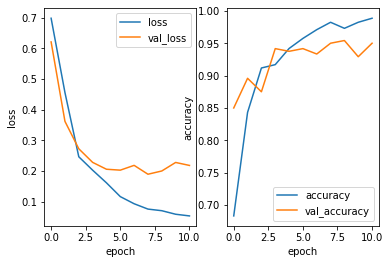

In [15]:
#wyświetl wykresy uczenia
hist = pd.DataFrame(history.history)

plt.subplot(1, 2, 1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

In [13]:
img, label = validation_dataset.next()
y_pred = model.predict(img)

1/1 [==============================] - 0s 85ms/step


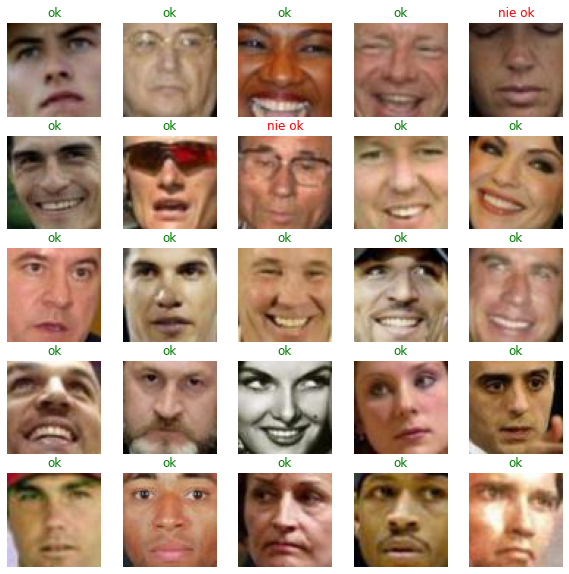

In [14]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i])
    plt.axis('off')
    if np.round(y_pred[i])[0] == label[i][0]:
        plt.title("ok", color = 'green')
    else:
        plt.title("nie ok", color = 'red')    